#### STAT 301 Project Group 22 Project Proposal
##### *By Janice Chan, Elias Khan, Davis Li, Daniel Yuan*

#### Introduction

One of our team members, Davis, is in Sauder studying business. He currently works at a Honda retailer selling cars. When we came across Kaggle, this car dataset stood out to us because it is directly correlated to what we’re interested in. As a salesman, it is important to gauge how much a potential buyer is willing to pay for a car in order to make the best suggestions to clients. This dataset helps us answer that question by providing input variables (demographics/attributes of a buyer) to predict the response variable (the price they paid for the car). 

##### Question:
As part of the exploratory data analysis and building the model, one of the key questions we want to ask is: “what attributes of a buyer can help us best predict how much a buyer is willing to pay for a car?”. To expand, as our project is based on prediction, we want to predict: “based on attributes of a buyer/consumer, how much would they be willing to pay for a car?”.

##### Dataset:
Our dataset is called “Car Sales Price Prediction” from Kaggle: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

The input variables for this dataset are: customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth.

The response variable for this dataset is: the amount paid for a car by the buyer

There are a total of 500 observations we can work with. While we identify that a limitation is that the dataset is small, future implementations beyond the scope of this course can be to use bootstrapping. However for the purposes of this project, we recognize this limitation.  

(linking sentence to previous research:)
From previous studies, it is shown that certain attributes of buyers are correlated with how much they spend on a car.

##### Relevant Research
The first scientific study we referenced states that there is a gender gap in terms of the premium paid for cars, stating that the gender of the buyer affects how much they pay for the car. [1]
The second scientific study we references states that there is international price discrimination for car sale prices, stating that the country of buyer affects how much they pay for the car. [2]

Although previous research indicate a relationship of buyers’ individual traits with car purchases, it does not look into the possible interactions or additionally considering multiple traits together. Hence why our research will expore in further detail and expand on previous studies to gain a better understanding of how these traits, along with others, may interplay with how much a buyer would spend on a car; providing a better model for prediction and knowledge of relationship between buyers and their car purchases.

##### Citations:
[1] Chandra, Gulati, et al. (https://www.albany.edu/sites/default/files/2019-08/Chandra.pdf)

[2] THE RAND JOURNAL OF ECONOMICS (https://www.jstor.org/stable/2555925) 


#### Preliminary Exploratory Data Analysis

The first important step is to load in the libraries we will need to analyse the dataset:

In [75]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(faux)

Now we can load in the dataset:

In [76]:
raw_car_data <- read_csv("car_purchasing.csv")
head(raw_car_data)

Rows: 500 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): customer name, customer e-mail, country
dbl (6): gender, age, annual Salary, credit card debt, net worth, car purcha...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Before we begin analyzing the data, it's important to decide which columns are important for our research and whether or not the data is clean.

Our first course of action will be to change the names of columns so that there are no spaces or symbols like "-" that will hinder our ability to analyze the data.

In [77]:
colnames(raw_car_data) <- gsub(" ", "_", colnames(raw_car_data))
colnames(raw_car_data) <- gsub("-", "", colnames(raw_car_data))
head(raw_car_data)

customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


Next we must change the gender column so that it is categorical, rather than numerical.

In [78]:
raw_car_data$gender[raw_car_data$gender == 0] <- "Male"
raw_car_data$gender[raw_car_data$gender == 1] <- "Female"


head(raw_car_data)

customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,Male,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,Male,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,Female,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,Female,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,Female,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,Female,56.82489,68499.85,14179.472,428485.4,56612.00


Finally, we must remove the columns "customer name", "customer e-mail", and "country".

These columns vary far too much and it would be nearly impossible to make any meaningful remarks from them.

In [79]:
car_data <- raw_car_data %>% select(-customer_name, -customer_email, -country)
head(car_data)

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,41.85172,62812.09,11609.381,238961.3,35321.46
Male,40.87062,66646.89,9572.957,530973.9,45115.53
Female,43.15290,53798.55,11160.355,638467.2,42925.71
Female,58.27137,79370.04,14426.165,548599.1,67422.36
Female,57.31375,59729.15,5358.712,560304.1,55915.46
Female,56.82489,68499.85,14179.472,428485.4,56612.00


Now we have clean data with only categorical and numerical values, we can begin analyzing the data.

We will first create a distribution of car purchase amounts to see how the amount people spend on cars varies overall.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



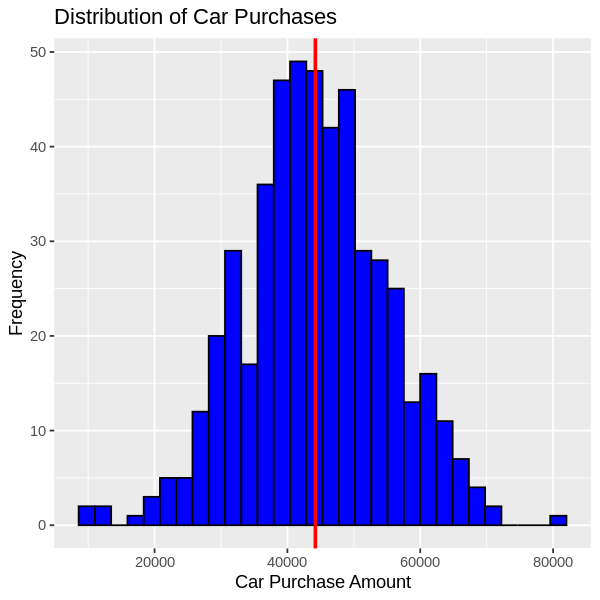

In [80]:
mean_purchase = mean(car_data$car_purchase_amount)

car_data %>% ggplot(aes(x=car_purchase_amount)) +
    geom_histogram(color = "black", fill = "blue") +
    geom_vline(xintercept= mean_purchase, color = "red", size = 1) +
    xlab("Car Purchase Amount") +
    ylab("Frequency") +
    ggtitle("Distribution of Car Purchases")
    

In [81]:
print('mean car purchase')
mean(car_data$car_purchase_amount)
print('median car purchase')
median(car_data$car_purchase_amount)
print('standard deviation of car purchases')
sd(car_data$car_purchase_amount)
print('quantiles of car purchases')
quantile(car_data$car_purchase_amount)

[1] "mean car purchase"


[1] 44209.8

[1] "median car purchase"


[1] 43997.78

[1] "standard deviation of car purchases"


[1] 10773.18

[1] "quantiles of car purchases"


0%      25%      50%      75%     100% 
 9000.00 37629.90 43997.78 51254.71 80000.00

These statistics combined with the visualisation above give us some valuable information about our data:

1. The distribution of car purchases is relatively symmetrical. We can see this visually, and we can confirm this by observing that the mean (44209.80 dollars) and the median ($43997.78 dollars) are very close in value. This tells us that there are roughly the same amount of people that spend more than the mean than those who spend less.

2. 50% of the purchases lie between 37629.90 and 51254.71 dollars. This indicates to us that the amount that customers spend doesn't vary that much since the upper and lower quartile are relatively close. This is also shown in how high the peak of the distribution is compared to the outer sections of the distribution.

Now that we've become a bit more familiar with our response variable, we can begin seeing how other variables in the dataset compare and correlate with our response variable.

In [82]:
head(car_data)

gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,41.85172,62812.09,11609.381,238961.3,35321.46
Male,40.87062,66646.89,9572.957,530973.9,45115.53
Female,43.15290,53798.55,11160.355,638467.2,42925.71
Female,58.27137,79370.04,14426.165,548599.1,67422.36
Female,57.31375,59729.15,5358.712,560304.1,55915.46
Female,56.82489,68499.85,14179.472,428485.4,56612.00


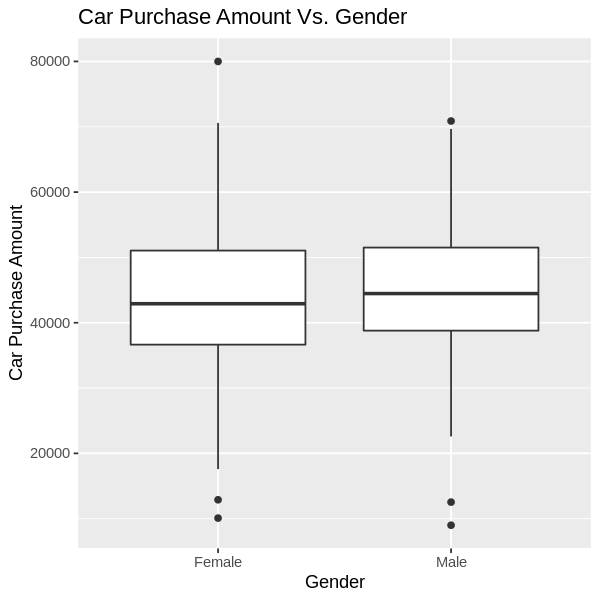

In [83]:
options(repr.plot.width = 5, repr.plot.height = 5)

gender_plot <- car_data %>% ggplot(aes(x = gender, y = car_purchase_amount)) +
                    geom_boxplot() +
    xlab("Gender")+
    ylab("Car Purchase Amount")+
    ggtitle("Car Purchase Amount Vs. Gender")


gender_plot

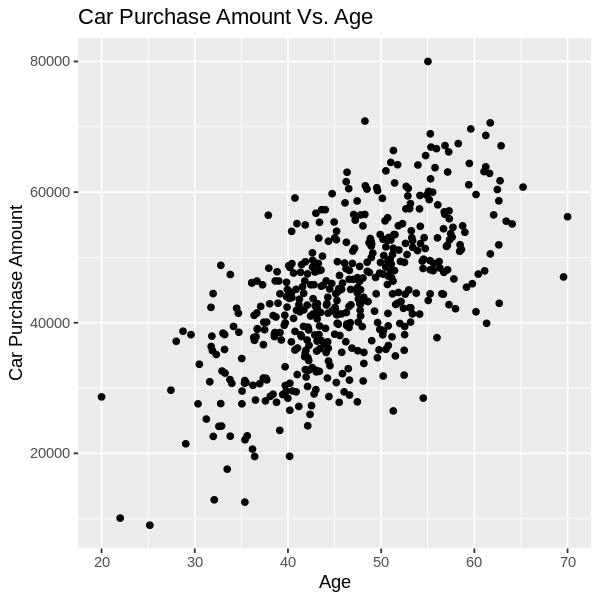

In [84]:
options(repr.plot.width = 5, repr.plot.height = 5)

age_plot <- car_data %>% ggplot(aes(x = age, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Age")+
    ylab("Car Purchase Amount")+
    ggtitle("Car Purchase Amount Vs. Age")

age_plot

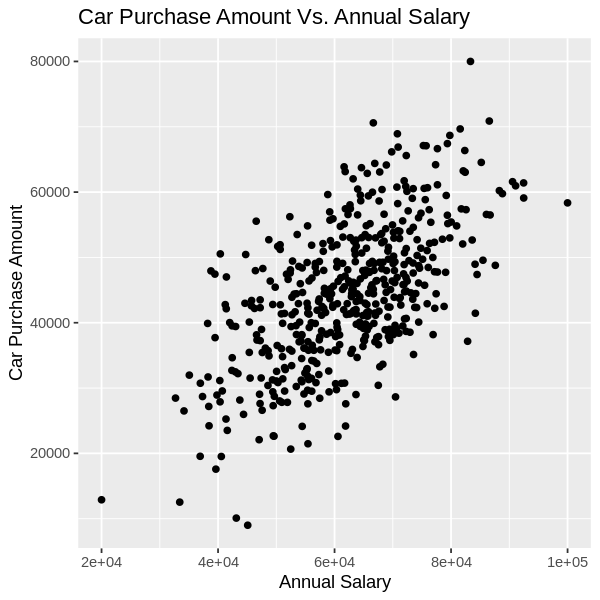

In [85]:
options(repr.plot.width = 5, repr.plot.height = 5)

annual_Salary_plot <- car_data %>% ggplot(aes(x = annual_Salary, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Annual Salary")+
    ylab("Car Purchase Amount")+
    ggtitle("Car Purchase Amount Vs. Annual Salary")

annual_Salary_plot

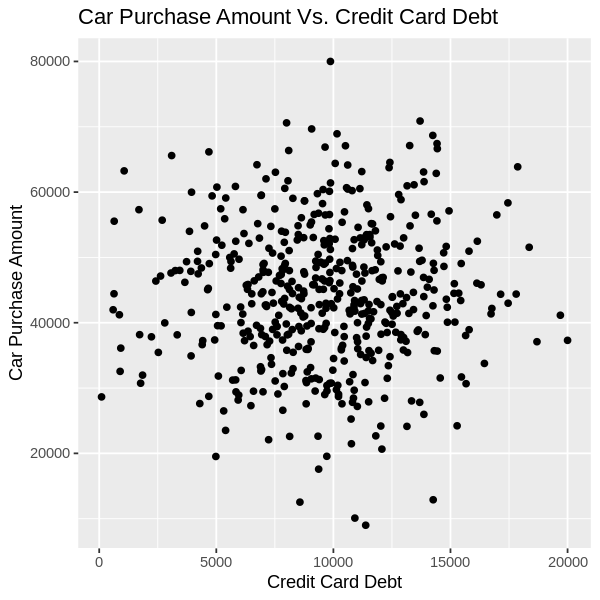

In [86]:
options(repr.plot.width = 5, repr.plot.height = 5)

credit_card_debt_plot <- car_data %>% ggplot(aes(x = credit_card_debt, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Credit Card Debt")+
    ylab("Car Purchase Amount")+
    ggtitle("Car Purchase Amount Vs. Credit Card Debt")

credit_card_debt_plot

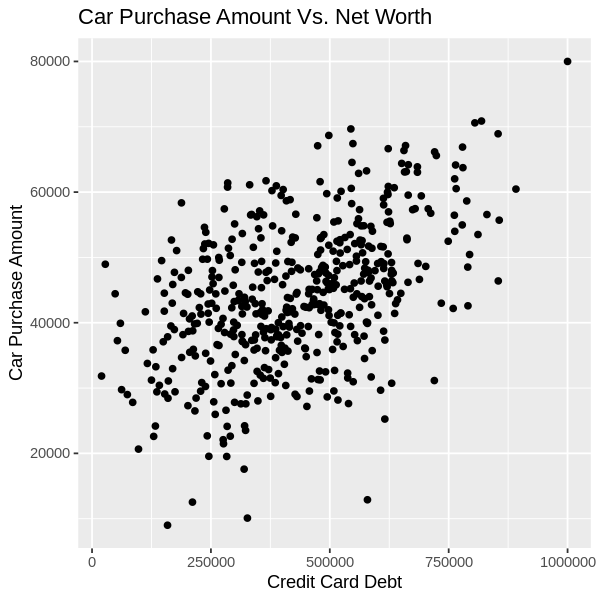

In [87]:
options(repr.plot.width = 5, repr.plot.height = 5)

net_worth_plot <- car_data %>% ggplot(aes(x = net_worth, y = car_purchase_amount)) +
                    geom_point() +
    xlab("Credit Card Debt")+
    ylab("Car Purchase Amount")+
    ggtitle("Car Purchase Amount Vs. Net Worth")

net_worth_plot

After visualizing how different variables stack against car purchase amount, it is safe to say that we will definitely be able to make a solid predictive model for our response variable. More than one of these plots shows strong correlation to the response variable, which gives us the confidence to end our exploratory analysis of the data and begin prepariong to fully analyze it and build models.

#### Methods

From our dataset, we will use multiple linear regression, assessing models and selecting the best variables for our predictive model using forward stepwise selection. We will evaluate models' predicted performance with the root mean squared error, assess goodness of fit with the adjusted R2, and select our predictive model by using the test MSE, Cp, AIC or BIC. We will perform on a training set from our data, and use it to predict values in the test set to test our model's prediction performance.

Based on our previous research and preliminary data analysis, we expect...

From our research, we expect to acheive an understanding of the attributes that contribute to car prices that consumers would spend on. We will gain an optimal model of the characteristics that have a relationship with car pricing to estimate. Moreover, our results will allow us to be able to estimate and predict reasonable car pricing for consumers. In turn, this may impact how car suggestions are offered depending on characteristics of the customer, and how automobile creators can decide cars to make with a certain budget and sale price for a particular audience. It provides greater insight on how to make the best choices as to which cars to offer consumers for their satisfaction, as well as a practical budget of cars to create for consumers without wasting goods, and economy on creating cars that may not perform well in a sales aspect. Our study may contribute for further research interests with the rise of electric cars and gas demands, economy impact by cars and gas, and environmental contributions by car uses with many who purchase cars. Our findings may be expanded in further study and research with characteristics of cars (not just the customers) to discover particular car types and/or qualities that impact how much certain consumers (by characteristic or income perhaps) spend. Further research can build on our study on those analyzing individuals' income and expenses, the demand that those may have to purchase a car, or even for studies on comparing qualities/characteristics based on data that may include spendings.